In [1]:
from kwantrl.simulations.pixel_array import pixelarrayQPC
from kwantrl.optimization.trajectory_optimization import trajectory_func_to_optimize
from kwantrl.optimization.cma import optimize_cma
from kwantrl.lossfunctions.staircasiness import staircasiness
from kwantrl.datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count

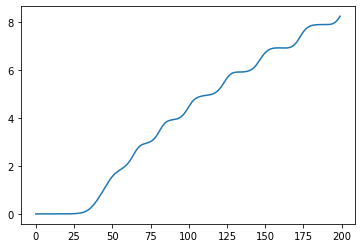

In [2]:
start=-3
stop=2
steps=200

# Parameters for QPC
disorder=0.2
outer_gates=-3
B_field=0
energy=1

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler()

test=QPC.parallel_transmission(common_voltages)
import matplotlib.pyplot as plt
with plt.style.context('classic'):
    plt.plot(test)

In [3]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.window_loss,'bounds':(-3,2),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result,es,run_id=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=3600)

data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/10/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=567588, Mon Jan 17 17:33:30 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 3.493344944013896e+01 1.0e+00 4.63e-01  5e-01  5e-01 3:48.0
termination on timeout=100 (Mon Jan 17 17:37:38 2022)
final/bestever f-value = 3.483473e+01 3.483473e+01
incumbent solution: [ 0.27320886 -0.08667985 -0.07220431 -0.0755477  -0.21428103  0.08220517
  0.12356745  0.1598328  ...]
std deviations: [0.46605569 0.45974738 0.46105218 0.4608477  0.45947909 0.45259812
 0.45816683 0.46535236 ...]


In [4]:
from kwantrl.plotting.plotting import plotter_class
import numpy as np
plotter=plotter_class(run_id)
# print(np.array(plotter.data['voltages'][0]).shape)
plotter.plot_loss()
plotter.plot_result()
plotter.plot_wave_func(-2)
plotter.plot_wave_func(-1.3)
plotter.plot_wave_func(-0.5)
plotter.plot_wave_func(0.5)

NameError: name 'run_id' is not defined